In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
# Load dataset
df = pd.read_csv(r"D:\tested.csv") 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [11]:
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [12]:
print(df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:

print(df.nunique())


PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


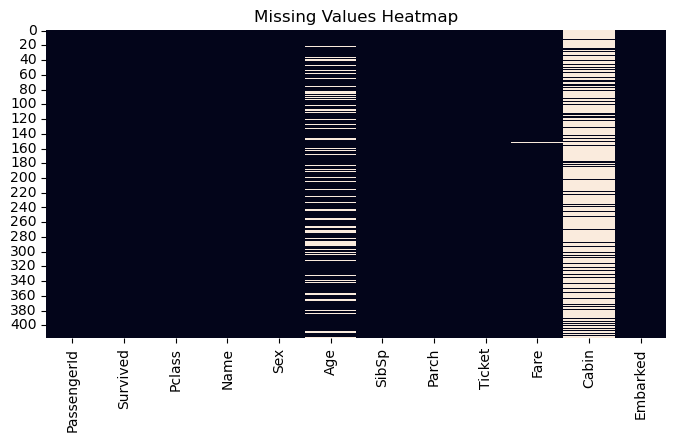

In [16]:
#Handling Missing Values -----------------------
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()



In [17]:
# Fill missing values for simple EDA
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


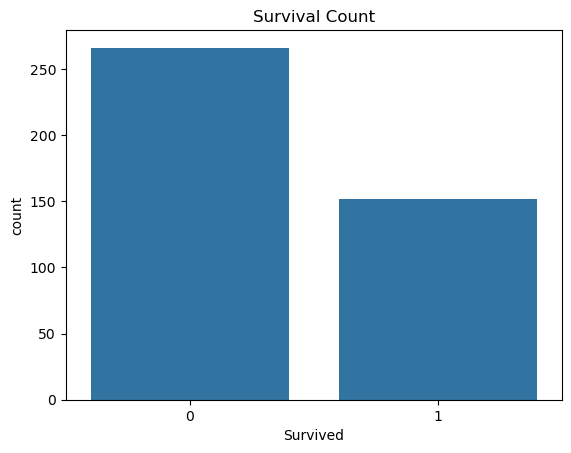

In [19]:
#Survived Count
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()



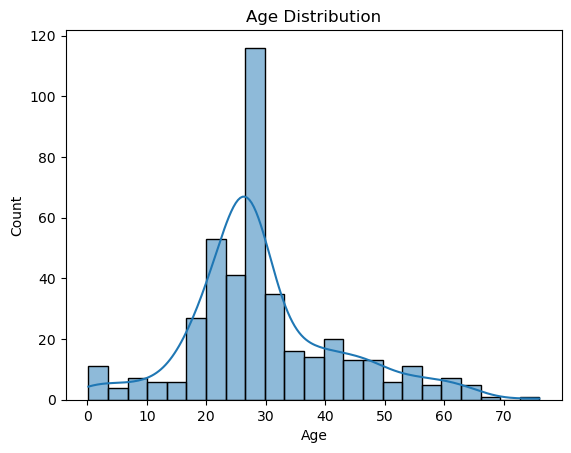

In [20]:
# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()



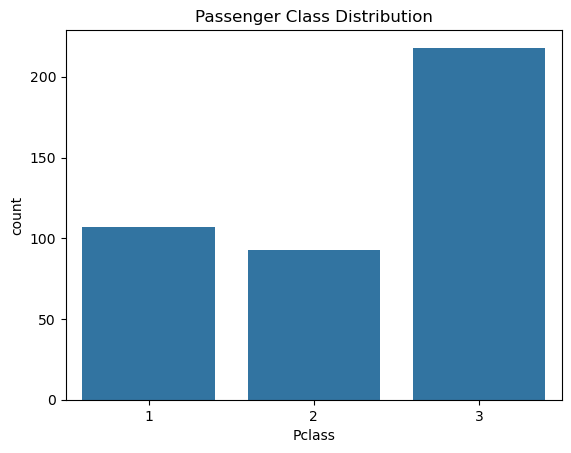

In [21]:
# Pclass distribution
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

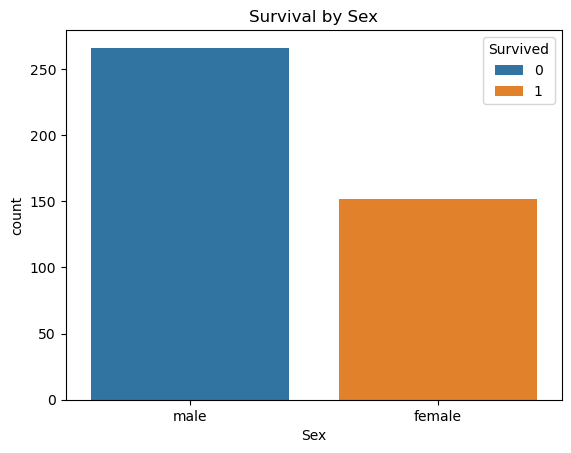

In [22]:
# Survival vs Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()



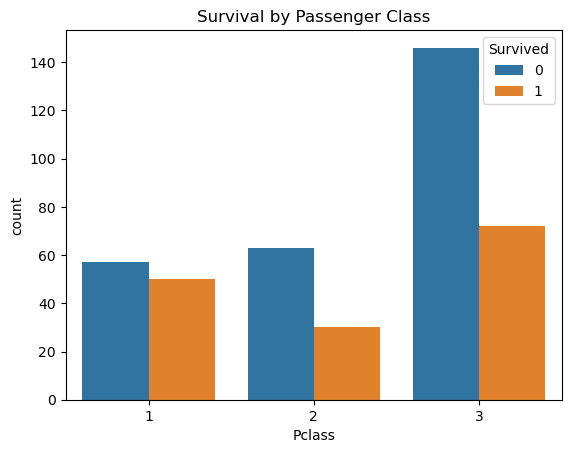

In [23]:
# Survival vs Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()



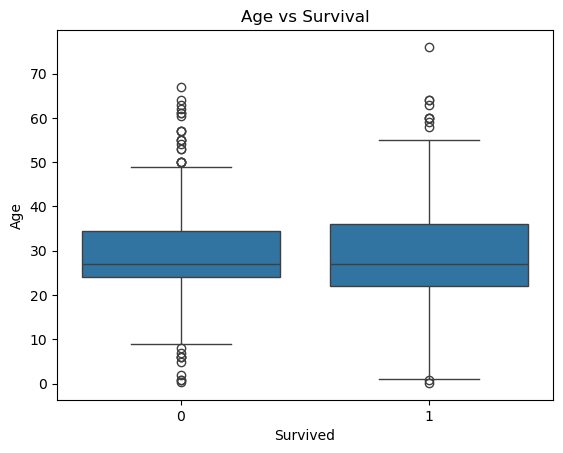

In [24]:
# Age vs Survival
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age vs Survival")
plt.show()

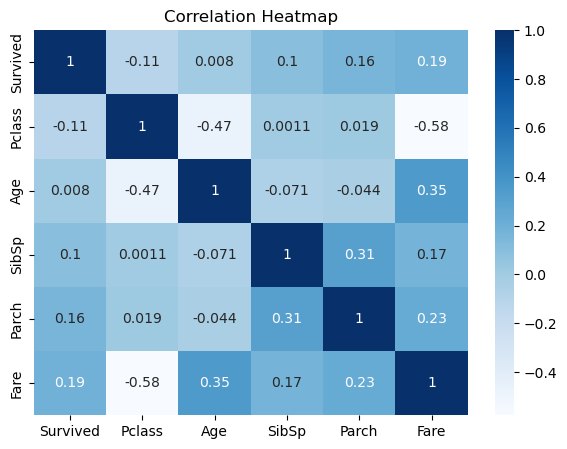

In [25]:
# Correlation Analysis
# -----------------------
numeric_df = df[['Survived','Pclass','Age','SibSp','Parch','Fare']]
plt.figure(figsize=(7,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [26]:
# Survival rate by Sex
print(df.groupby('Sex')['Survived'].mean())



Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


In [27]:
# Survival rate by Class
print(df.groupby('Pclass')['Survived'].mean())



Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


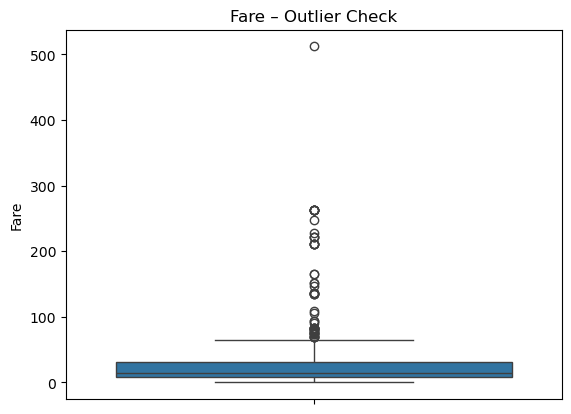

Skewness of Fare: 3.6872133081121405


In [28]:
# -----------------------
# 7. Outlier Detection
# -----------------------
sns.boxplot(df['Fare'])
plt.title("Fare – Outlier Check")
plt.show()

print("Skewness of Fare:", df['Fare'].skew())